In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [5]:
def float_conversion(value_str):
    try:
        value=float(value_str.replace(",",""))
        return value
    except:
        pass

In [6]:
df=pd.read_csv("ilc_lvho02_2017-07-16.csv")

In [11]:
df.head(7)

,TIME,GEO,INCGRP,HHTYP,TENURE,Value,Flag and Footnotes,Value_parsed
0,2015,"European Union (EU6-1972, EU9-1980, EU10-1985,...",Total,Total,Owner,69.5,NaN,69.5
1,2015,"European Union (EU6-1972, EU9-1980, EU10-1985,...",Total,Total,Tenant,30.5,NaN,30.5
2,2015,European Union (28 countries),Total,Total,Owner,69.4,NaN,69.4
3,2015,European Union (28 countries),Total,Total,Tenant,30.6,NaN,30.6
4,2015,European Union (27 countries),Total,Total,Owner,69.2,NaN,69.2
5,2015,European Union (27 countries),Total,Total,Tenant,30.8,NaN,30.8
6,2015,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...",Total,Total,Owner,66.4,e,66.4


In [7]:
df["Value_parsed"]=df["Value"].apply(float_conversion)

In [14]:
df=df[["GEO", "TENURE", "Value_parsed"]]

In [15]:
dfown=df[df['TENURE']=="Owner"]
dfrent=df[df['TENURE']=="Tenant"]

In [17]:
dfmerged=dfown.merge(dfrent, left_on="GEO", right_on="GEO")

In [19]:
dfmerged=dfmerged[["GEO", "Value_parsed_x", "Value_parsed_y"]]
dfmerged.columns = (["GEO", "share_own", "share_rent"])

In [20]:
dfmerged.head(7)

,GEO,share_own,share_rent
0,"European Union (EU6-1972, EU9-1980, EU10-1985,...",69.5,30.5
1,European Union (28 countries),69.4,30.6
2,European Union (27 countries),69.2,30.8
3,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...",66.4,33.6
4,Euro area (19 countries),66.4,33.6
5,Euro area (18 countries),66.2,33.8
6,Belgium,71.4,28.6


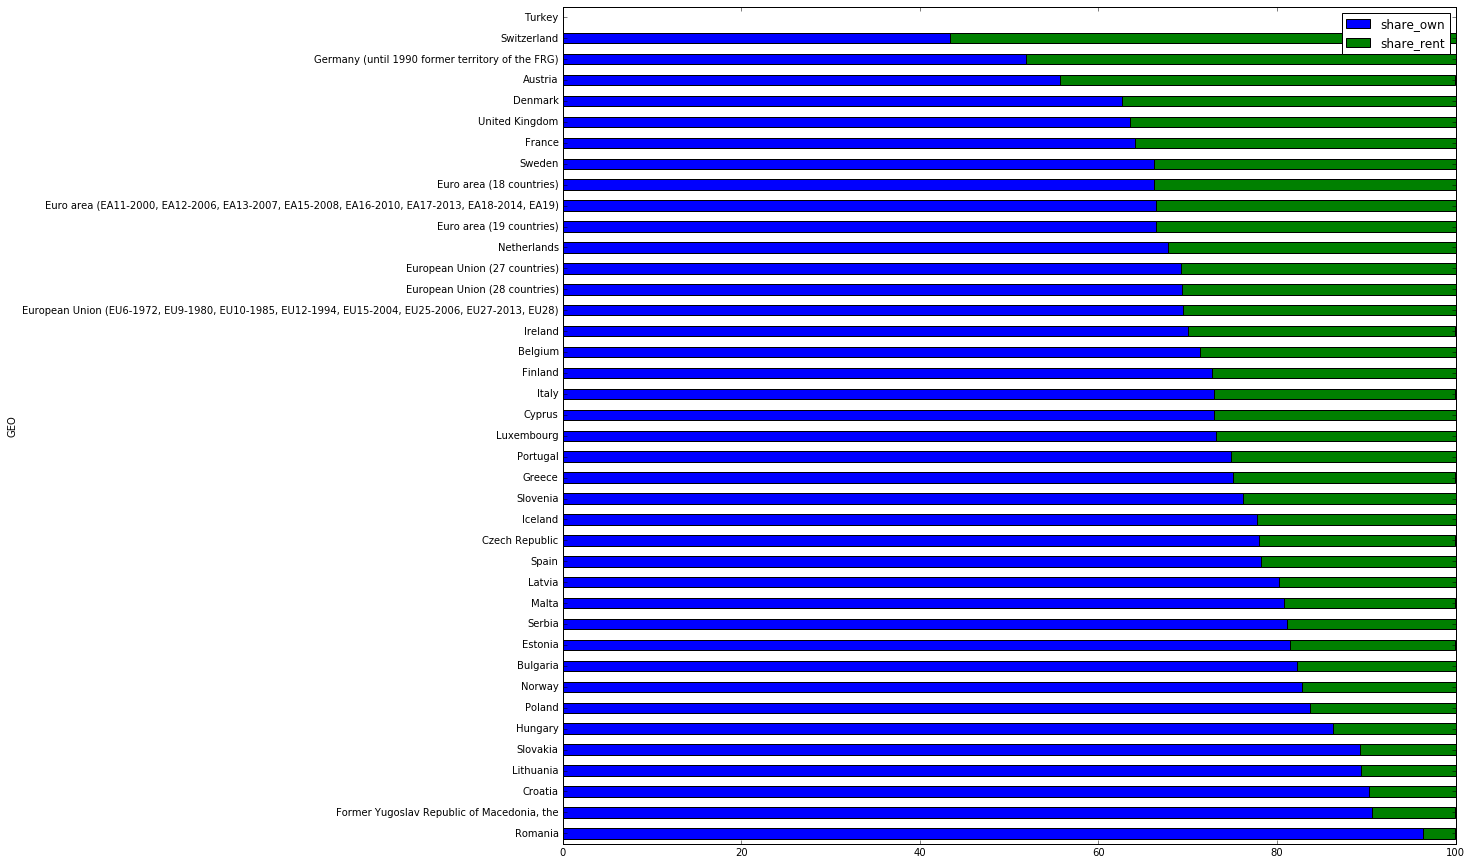

In [26]:
dfmerged.sort_values(by="share_rent", ascending=True).plot(kind="barh", x="GEO", stacked = True, figsize=(16,15))
# plt.savefig("TenureStatus.pdf", Transparent=True)

In [85]:
dfmerged

,GEO,share_own,share_rent
0,"European Union (EU6-1972, EU9-1980, EU10-1985,...",69.5,30.5
1,European Union (28 countries),69.4,30.6
2,European Union (27 countries),69.2,30.8
3,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...",66.4,33.6
4,Euro area (19 countries),66.4,33.6
5,Euro area (18 countries),66.2,33.8
6,Belgium,71.4,28.6
7,Bulgaria,82.3,17.7
8,Czech Republic,78.0,22.0
9,Denmark,62.7,37.3


# Querying the RentsWatch API

http://api.rentswatch.com/#api-Cities-show

In [35]:
import requests
city_ranking = requests.get('http://api.rentswatch.com/api/cities/ranking?indicator=avgPricePerSqm')

In [36]:
city_data = city_ranking.json()

In [44]:
print("The type of bestseller_data is:", type(city_data))
city_data[0:10]

The type of bestseller_data is: <class 'list'>


[['London', 30.159116033234955],
 ['Geneva', 29.084709595466705],
 ['Zürich', 26.69590676100539],
 ['Stockholm', 25.797964698358918],
 ['Paris', 24.171929387097045],
 ['Helsinki', 23.40874723255044],
 ['Amsterdam', 21.149368213630204],
 ['Copenhagen', 19.95677548773105],
 ['Nice', 17.99329648691014],
 ['Munich', 17.79345644640021]]

In [38]:
import requests
Berlin_response = requests.get('http://api.rentswatch.com/api/cities/search?q=Berlin')
Berlin_data = Berlin_response.json()

In [40]:
Berlin_data

[{'avgPricePerSqm': 10.66770548316913,
  'country': 'DE',
  'inequalityIndex': 0.17231025975156183,
  'lastSnapshot': 1485197053,
  'latitude': 52.52437,
  'longitude': 13.41053,
  'name': 'Berlin',
  'radius': 25,
  'ranked': True,
  'slug': 'berlin',
  'stdErr': 0.02166457714972538,
  'total': 41112}]

In [51]:
capitals_list = ["Vienna", "Brussels", "Sofia", "Zagreb","Nicosia", "Prague", "Copenhagen", "Tallinn", "Helsinki", "Paris", "Berlin", "Athens", "Budapest", "Dublin", "Rome", "Riga", "Vilnius", "Luxembourg", "Valletta", "Amsterdam", "Warsaw", "Lisbon", "Bucharest", "Bratislava","Ljubljana", "Madrid", "Stockholm", "London"]           
city_data_list = []

for city in capitals_list:
    city_response = requests.get('http://api.rentswatch.com/api/cities/search?q='+city)
    city_data = city_response.json()
    city_data_list.append(city_data)

In [52]:
city_data_list

[[{'avgPricePerSqm': 13.58609000321524,
   'country': 'AT',
   'inequalityIndex': 0.15384569304148002,
   'lastSnapshot': 1485196997,
   'latitude': 48.20849,
   'longitude': 16.37208,
   'name': 'Vienna',
   'radius': 14,
   'ranked': True,
   'slug': 'vienna',
   'stdErr': 0.0189983088036788,
   'total': 46394}],
 [{'avgPricePerSqm': 11.953923414750692,
   'country': 'BE',
   'inequalityIndex': 0.12113358639356855,
   'lastSnapshot': 1485197003,
   'latitude': 50.85045,
   'longitude': 4.34878,
   'name': 'Brussels',
   'radius': 10,
   'ranked': True,
   'slug': 'brussels',
   'stdErr': 0.028922760629403854,
   'total': 21507}],
 [],
 [{'avgPricePerSqm': 7.549999748072931,
   'country': 'HR',
   'inequalityIndex': 0.1261222655168899,
   'lastSnapshot': 1485197098,
   'latitude': 45.81444,
   'longitude': 15.97798,
   'name': 'Zagreb',
   'radius': 8,
   'ranked': True,
   'slug': 'zagreb',
   'stdErr': 0.19739321978822955,
   'total': 1451}],
 [],
 [{'avgPricePerSqm': 9.806182593663

In [56]:
city_data_cleaned =[{'avgPricePerSqm': 13.58609000321524,
   'country': 'AT',
   'inequalityIndex': 0.15384569304148002,
   'lastSnapshot': 1485196997,
   'latitude': 48.20849,
   'longitude': 16.37208,
   'name': 'Vienna',
   'radius': 14,
   'ranked': True,
   'slug': 'vienna',
   'stdErr': 0.0189983088036788,
   'total': 46394},
 {'avgPricePerSqm': 11.953923414750692,
   'country': 'BE',
   'inequalityIndex': 0.12113358639356855,
   'lastSnapshot': 1485197003,
   'latitude': 50.85045,
   'longitude': 4.34878,
   'name': 'Brussels',
   'radius': 10,
   'ranked': True,
   'slug': 'brussels',
   'stdErr': 0.028922760629403854,
   'total': 21507},
 {'avgPricePerSqm': 7.549999748072931,
   'country': 'HR',
   'inequalityIndex': 0.1261222655168899,
   'lastSnapshot': 1485197098,
   'latitude': 45.81444,
   'longitude': 15.97798,
   'name': 'Zagreb',
   'radius': 8,
   'ranked': True,
   'slug': 'zagreb',
   'stdErr': 0.19739321978822955,
   'total': 1451},
 {'avgPricePerSqm': 9.806182593663557,
   'country': 'CZ',
   'inequalityIndex': 0.1619924733268887,
   'lastSnapshot': 1485197008,
   'latitude': 50.08804,
   'longitude': 14.42076,
   'name': 'Prague',
   'radius': 11,
   'ranked': True,
   'slug': 'prague',
   'stdErr': 0.025141110247523926,
   'total': 27092},
 {'avgPricePerSqm': 19.95677548773105,
   'country': 'DK',
   'inequalityIndex': 0.32397861878018974,
   'lastSnapshot': 1485197066,
   'latitude': 55.67594,
   'longitude': 12.56553,
   'name': 'Copenhagen',
   'radius': 11,
   'ranked': True,
   'slug': 'copenhagen',
   'stdErr': 0.0338397015955383,
   'total': 15239},
 {'avgPricePerSqm': 10.503911670174588,
   'country': 'EE',
   'inequalityIndex': 0.19100075075336556,
   'lastSnapshot': 1485197068,
   'latitude': 59.43696,
   'longitude': 24.75353,
   'name': 'Tallinn',
   'radius': 6,
   'ranked': True,
   'slug': 'tallinn',
   'stdErr': 0.03158836514933275,
   'total': 11666},
 {'avgPricePerSqm': 23.40874723255044,
   'country': 'FI',
   'inequalityIndex': 0.18934246567533183,
   'lastSnapshot': 1485197084,
   'latitude': 60.16952,
   'longitude': 24.93545,
   'name': 'Helsinki',
   'radius': 7,
   'ranked': True,
   'slug': 'helsinki',
   'stdErr': 0.027819328216208448,
   'total': 13787},
 {'avgPricePerSqm': 24.171929387097045,
   'country': 'FR',
   'inequalityIndex': 0.20897144941114706,
   'lastSnapshot': 1485197088,
   'latitude': 48.85341,
   'longitude': 2.3488,
   'name': 'Paris',
   'radius': 17,
   'ranked': True,
   'slug': 'paris',
   'stdErr': 0.017093629274543793,
   'total': 38833},
 {'avgPricePerSqm': 10.66770548316913,
   'country': 'DE',
   'inequalityIndex': 0.17231025975156183,
   'lastSnapshot': 1485197053,
   'latitude': 52.52437,
   'longitude': 13.41053,
   'name': 'Berlin',
   'radius': 25,
   'ranked': True,
   'slug': 'berlin',
   'stdErr': 0.02166457714972538,
   'total': 41112},
 {'avgPricePerSqm': 12.753065651749816,
   'country': 'HU',
   'inequalityIndex': 10.248178000051702,
   'lastSnapshot': 1485197099,
   'latitude': 47.49801,
   'longitude': 19.03991,
   'name': 'Budapest',
   'radius': 14,
   'ranked': True,
   'slug': 'budapest',
   'stdErr': 0.10247336745136673,
   'total': 2585},
 {'avgPricePerSqm': 13.965809105056389,
   'country': 'IT',
   'inequalityIndex': 0.19210578834568398,
   'lastSnapshot': 1485197104,
   'latitude': 41.89193,
   'longitude': 12.51133,
   'name': 'Rome',
   'radius': 18,
   'ranked': True,
   'slug': 'rome',
   'stdErr': 0.03253710864523095,
   'total': 19838},
 {'avgPricePerSqm': 8.243037725243843,
   'country': 'ES',
   'inequalityIndex': 0.06791926954237441,
   'lastSnapshot': 1485197075,
   'latitude': 42.84998,
   'longitude': -2.67268,
   'name': 'Vitoria-Gasteiz',
   'radius': 5,
   'ranked': True,
   'slug': 'vitoria-gasteiz',
   'stdErr': 0.13445321827326703,
   'total': 762},
  {'avgPricePerSqm': 9.25542789597202,
   'country': 'LV',
   'inequalityIndex': 0.17699151441487385,
   'lastSnapshot': 1485197113,
   'latitude': 56.946,
   'longitude': 24.10589,
   'name': 'Riga',
   'radius': 8,
   'ranked': True,
   'slug': 'riga',
   'stdErr': 0.027827981890029597,
   'total': 23655},
 {'avgPricePerSqm': 8.796739664109182,
   'country': 'LT',
   'inequalityIndex': 0.18318887653395458,
   'lastSnapshot': 1485197111,
   'latitude': 54.68916,
   'longitude': 25.2798,
   'name': 'Vilnius',
   'radius': 7,
   'ranked': True,
   'slug': 'vilnius',
   'stdErr': 0.027115770105918306,
   'total': 21091},
 {'avgPricePerSqm': 21.149368213630204,
   'country': 'NL',
   'inequalityIndex': 0.1946992224855299,
   'lastSnapshot': 1485197116,
   'latitude': 52.37403,
   'longitude': 4.88969,
   'name': 'Amsterdam',
   'radius': 8,
   'ranked': True,
   'slug': 'amsterdam',
   'stdErr': 0.05788865317675644,
   'total': 5895},
 {'avgPricePerSqm': 13.305460665035936,
   'country': 'PL',
   'inequalityIndex': 0.18822312335388375,
   'lastSnapshot': 1485197118,
   'latitude': 52.22977,
   'longitude': 21.01178,
   'name': 'Warsaw',
   'radius': 14,
   'ranked': True,
   'slug': 'warsaw',
   'stdErr': 0.018785283966359995,
   'total': 44036},
 {'avgPricePerSqm': 11.24887278288024,
   'country': 'PT',
   'inequalityIndex': 0.28018116513267655,
   'lastSnapshot': 1485197127,
   'latitude': 38.71667,
   'longitude': -9.13333,
   'name': 'Lisbon',
   'radius': 7,
   'ranked': True,
   'slug': 'lisbon',
   'stdErr': 0.20878691757149048,
   'total': 801},
 {'avgPricePerSqm': 10.043127447711829,
   'country': 'SK',
   'inequalityIndex': 0.12266319901664435,
   'lastSnapshot': 1485197132,
   'latitude': 48.14816,
   'longitude': 17.10674,
   'name': 'Bratislava',
   'radius': 6,
   'ranked': True,
   'slug': 'bratislava',
   'stdErr': 0.02358115670334024,
   'total': 25192},
 {'avgPricePerSqm': 10.694441489022426,
   'country': 'SI',
   'inequalityIndex': 0.11393263066299908,
   'lastSnapshot': 1485197130,
   'latitude': 46.05108,
   'longitude': 14.50513,
   'name': 'Ljubljana',
   'radius': 5,
   'ranked': True,
   'slug': 'ljubljana',
   'stdErr': 0.036573735691765814,
   'total': 10823},
 {'avgPricePerSqm': 11.502091086432907,
   'country': 'ES',
   'inequalityIndex': 0.20491153296966821,
   'lastSnapshot': 1485197077,
   'latitude': 40.4165,
   'longitude': -3.70256,
   'name': 'Madrid',
   'radius': 24,
   'ranked': True,
   'slug': 'madrid',
   'stdErr': 0.03351331774186669,
   'total': 18357},
 {'avgPricePerSqm': 25.797964698358918,
   'country': 'SE',
   'inequalityIndex': 0.18982800867851907,
   'lastSnapshot': 1485197128,
   'latitude': 59.33258,
   'longitude': 18.0649,
   'name': 'Stockholm',
   'radius': 11,
   'ranked': True,
   'slug': 'stockholm',
   'stdErr': 0.039269522173343736,
   'total': 10516},
 {'avgPricePerSqm': 30.159116033234955,
   'country': 'UK',
   'inequalityIndex': 0.1612149473039974,
   'lastSnapshot': 1485197135,
   'latitude': 51.507351,
   'longitude': -0.127758,
   'name': 'London',
   'radius': 20,
   'ranked': True,
   'slug': 'london',
   'stdErr': 0.1333053993886794,
   'total': 682}]

In [59]:
dfrent= pd.DataFrame(city_data_cleaned)

In [61]:
dfrent.describe()

,avgPricePerSqm,inequalityIndex,lastSnapshot,latitude,longitude,radius,stdErr,total
count,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000
mean,14.478172,0.635124,1.485197e+09,50.194220,12.273286,11.636364,0.058117,18241.545455
std,6.495056,2.147780,4.178423e+01,6.112144,10.123812,5.964542,0.058120,14419.920777
min,7.550000,0.067919,1.485197e+09,38.716670,-9.133330,5.000000,0.017094,682.000000
25%,10.158324,0.155688,1.485197e+09,46.412812,4.484007,7.000000,0.025635,7050.250000
50%,11.728007,0.185706,1.485197e+09,50.469245,14.462945,10.500000,0.032063,16798.000000
75%,18.459034,0.194051,1.485197e+09,54.147962,18.796157,14.000000,0.053234,24807.750000
max,30.159116,10.248178,1.485197e+09,60.169520,25.279800,25.000000,0.208787,46394.000000


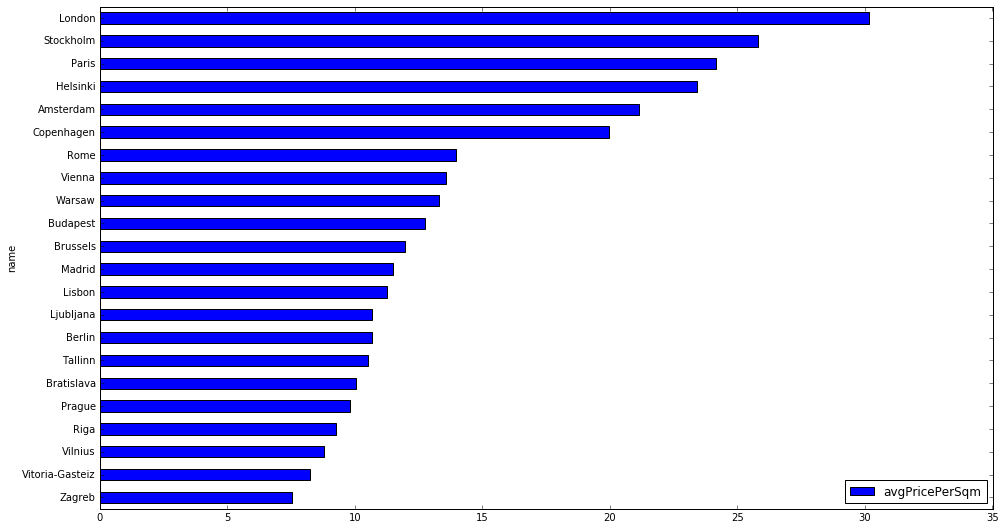

In [70]:
dfrent.sort_values(by="avgPricePerSqm", ascending=True).plot(kind="barh", x = "name", y="avgPricePerSqm", figsize=(16,9))
# plt.savefig("AverageRentPrices.pdf", transparent=True)

In [67]:
dfrent

,avgPricePerSqm,country,inequalityIndex,lastSnapshot,latitude,longitude,name,radius,ranked,slug,stdErr,total
0,13.586090,AT,0.153846,1485196997,48.208490,16.372080,Vienna,14,True,vienna,0.018998,46394
1,11.953923,BE,0.121134,1485197003,50.850450,4.348780,Brussels,10,True,brussels,0.028923,21507
2,7.550000,HR,0.126122,1485197098,45.814440,15.977980,Zagreb,8,True,zagreb,0.197393,1451
3,9.806183,CZ,0.161992,1485197008,50.088040,14.420760,Prague,11,True,prague,0.025141,27092
4,19.956775,DK,0.323979,1485197066,55.675940,12.565530,Copenhagen,11,True,copenhagen,0.033840,15239
5,10.503912,EE,0.191001,1485197068,59.436960,24.753530,Tallinn,6,True,tallinn,0.031588,11666
6,23.408747,FI,0.189342,1485197084,60.169520,24.935450,Helsinki,7,True,helsinki,0.027819,13787
7,24.171929,FR,0.208971,1485197088,48.853410,2.348800,Paris,17,True,paris,0.017094,38833
8,10.667705,DE,0.172310,1485197053,52.524370,13.410530,Berlin,25,True,berlin,0.021665,41112
9,12.753066,HU,10.248178,1485197099,47.498010,19.039910,Budapest,14,True,budapest,0.102473,2585


In [71]:
df2 = pd.read_csv("ilc_lvho08a_2017-07-18.csv")

In [74]:
df2.head()

,TIME,GEO,UNIT,INCGRP,AGE,SEX,Value,Flag and Footnotes
0,2007,European Union (28 countries),Percentage,Below 60% of median equivalised income,Total,Total,:,NaN
1,2007,European Union (28 countries),Percentage,Above 60% of median equivalised income,Total,Total,:,NaN
2,2007,European Union (28 countries),Percentage,Total,Total,Total,:,NaN
3,2007,Belgium,Percentage,Below 60% of median equivalised income,Total,Total,34.6,NaN
4,2007,Belgium,Percentage,Above 60% of median equivalised income,Total,Total,14.9,NaN


In [75]:
df2 = df2[(df2["TIME"]==2015)&(df2["INCGRP"]=="Total")]

In [77]:
df2["rentasshareofincome"]=df2["Value"].apply(float_conversion)

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
df2 = df2[["GEO", "rentasshareofincome"]]

In [81]:
df2.to_csv("rentburden.csv")

In [84]:
df2.sort_values(by="rentasshareofincome", ascending=True)

,GEO,rentasshareofincome
896,Malta,4.2
890,Luxembourg,8.0
881,Cyprus,9.5
878,Italy,11.4
914,Slovenia,11.8
860,Estonia,12.1
863,Ireland,12.2
920,Finland,12.3
869,Spain,12.5
872,France,13.1
